In [84]:
# Pagrindinės bibliotekos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Vizualizacijai, atkreipkite dėmesį, kad naudojame "matplotlib" pagrindu
import warnings
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import sqlite3

# Duomenų modeliavimas ir analizė
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Darbas su interneto naršyklėmis per Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Įspėjimų ignoravimas
warnings.filterwarnings('ignore')

# Specializuoti moduliai
from numpy.polynomial import Polynomial

In [85]:
data = r"C:\Users\Pauliussl\Paskaita83\vilkaviskio_lab.csv"
data = pd.read_csv(data)
data.drop(columns=['_type'], inplace=True)
data.head()

,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,tyrimo_data,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze
0,5a895f69-c3b2-49d3-82e4-e51c0ae85cc6,8a7e13cb-969c-43e7-9f13-957ea2cac651,NaN,00000686c24d12e,Vilkaviškio ligoninė,508f39246a00e95,V,1945-01-01,Hematologija,2024-08-13,Kraujas,Hematokritas (HCT),4544-3,36.0,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija
1,575d83ca-588e-4634-887e-24f1e462cbf8,bc20f177-781a-43ec-bd0b-3f8e3f6e7662,NaN,00000bad5e372ed,Vilkaviškio ligoninė,19c99cac5aed2e3,V,1955-01-01,Hematologija,2023-01-08,Kraujas,Monocitai (MON%),5905-5,1.0,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ..."
2,b1a75324-3244-4a7e-bd12-e965524546fb,51ce1b9a-1b77-47f4-bf1f-0507cd054a63,NaN,00001f1f3b803fb,Vilkaviškio ligoninė,a09a0e99b6fb9b1,M,1977-01-01,Imunologija,2023-06-04,Serumas,High sensitive troponin I,49563-0,4.0,0.0,19.0,ng/l,I99,Kiti ir nepatikslinti kraujotakos sistemos sut...
3,d74769ff-9304-4196-be2c-f97c2739f22e,d4aacac8-730d-4540-bac8-1038cd76a1e1,NaN,00004cc3b73e325,Vilkaviškio ligoninė,3a779300a6374f4,M,1950-01-01,Hematologija,2023-05-12,Kraujas,Vid. eritrocito tūris (MCV),787-2,87.0,80.0,100.0,fl,Z01.7,Laboratorinis ištyrimas
4,2811a0b0-e803-49eb-bc46-be3749ee3169,eef6ce89-b992-45f6-bdad-4131c6cd6adc,NaN,00004fde4f734db,Vilkaviškio ligoninė,208df6093aa652f,M,1956-01-01,Hematologija,2023-12-21,Kraujas,Hematokritas (HCT),4544-3,23.0,33.5,52.0,l/l,K72.9,"Kepenų nepakankamumas, nepatikslintas"


In [86]:
data = data[['paciento_lytis', 'paciento_gimimo_metai', 'tyrimo_grupe', 'tyrimo_data', 'tyrimo_meginio_tipas', 'tyrimo_analite', 'analites_loinc_kodas', 'analites_rezultatas', 'analites_norma_nuo', 'analites_norma_iki', 'matavimo_vienetas', 'paciento_diagnozes_tlk_10_am_kodas', 'paciento_diagnoze' ]]
data.head()

,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,tyrimo_data,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze
0,V,1945-01-01,Hematologija,2024-08-13,Kraujas,Hematokritas (HCT),4544-3,36.0,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija
1,V,1955-01-01,Hematologija,2023-01-08,Kraujas,Monocitai (MON%),5905-5,1.0,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ..."
2,M,1977-01-01,Imunologija,2023-06-04,Serumas,High sensitive troponin I,49563-0,4.0,0.0,19.0,ng/l,I99,Kiti ir nepatikslinti kraujotakos sistemos sut...
3,M,1950-01-01,Hematologija,2023-05-12,Kraujas,Vid. eritrocito tūris (MCV),787-2,87.0,80.0,100.0,fl,Z01.7,Laboratorinis ištyrimas
4,M,1956-01-01,Hematologija,2023-12-21,Kraujas,Hematokritas (HCT),4544-3,23.0,33.5,52.0,l/l,K72.9,"Kepenų nepakankamumas, nepatikslintas"


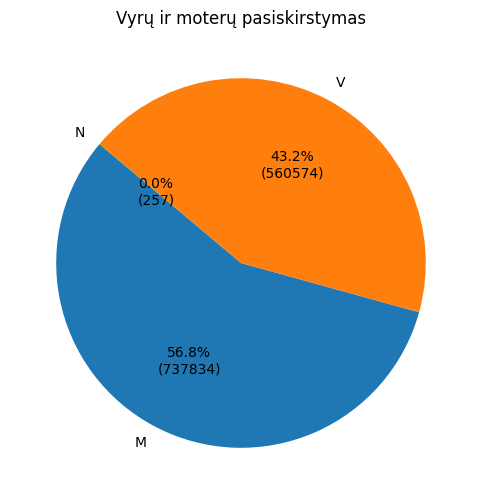

In [87]:
# Kiek vyrų ir moterų yra imtyje.
vyru_moteru_imtis = data['paciento_lytis'].value_counts()
vyru_moteru_imtis

plt.figure(figsize=(8, 6))
# plt.pie(vyru_moteru_imtis, labels=vyru_moteru_imtis.index, autopct='%.1f%%', startangle=140)
plt.pie(vyru_moteru_imtis, labels=vyru_moteru_imtis.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(vyru_moteru_imtis)/100), startangle=140)     #???????????????????????#
plt.title('Vyrų ir moterų pasiskirstymas')
plt.show()

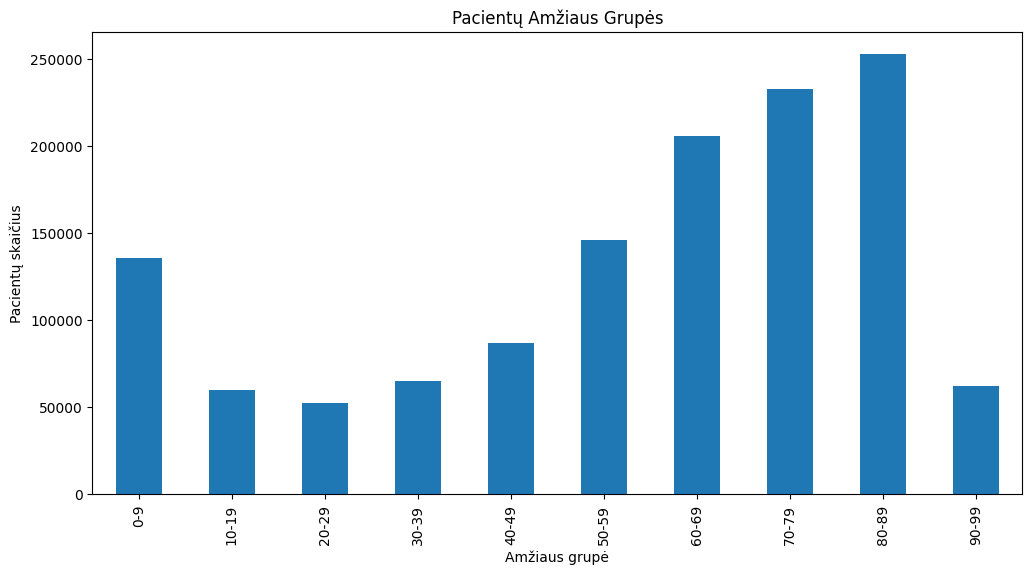

In [88]:
# Kokio amžiaus yra tiriamieji asmenys.
# Kokių amžiaus grupių yra imtyje.
import pandas as pd
import matplotlib.pyplot as plt

# Prielaidos apie 'data', kad jame yra 'paciento_gimimo_metai' ir 'tyrimo_data' stulpeliai
pacientu_amzius = data[['paciento_gimimo_metai', 'tyrimo_data']]

# Duomenų konvertavimas į datų tipą
pacientu_amzius['paciento_gimimo_metai'] = pd.to_datetime(pacientu_amzius['paciento_gimimo_metai'])
pacientu_amzius['tyrimo_data'] = pd.to_datetime(pacientu_amzius['tyrimo_data'])

# Amžiaus skaičiavimas
pacientu_amzius['amzius'] = (pacientu_amzius['tyrimo_data'] - pacientu_amzius['paciento_gimimo_metai']).dt.days // 365

pacientu_amzius.head()
# Naudojame pd.cut() kurti amžiaus grupes
pacientu_amzius['amziu_grupes'] = pd.cut(pacientu_amzius['amzius'], bins=range(0, 110, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Skaičiuojame kiekvienos grupės dažnumą
amziu_grupiu_daznumas = pacientu_amzius['amziu_grupes'].value_counts().sort_index()

# Vizualizacijos kūrimas
plt.figure(figsize=(12, 6))
amziu_grupiu_daznumas.plot(kind='bar')
plt.title('Pacientų Amžiaus Grupės')
plt.xlabel('Amžiaus grupė')
plt.ylabel('Pacientų skaičius')
plt.show()


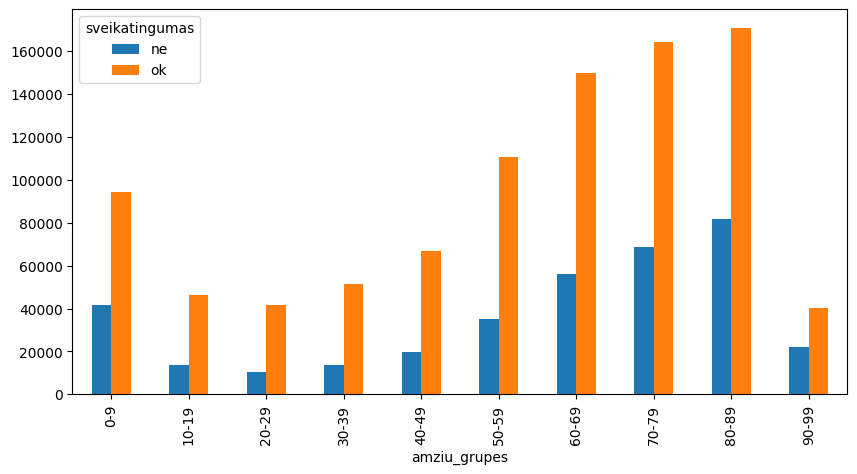

In [89]:
# Įvertinkite bendrą sveikatos būklę kiekvienoje amžiaus grupėje.
####
data2 = data[['paciento_lytis', 'paciento_gimimo_metai', 'tyrimo_grupe', 'tyrimo_data', 'tyrimo_meginio_tipas', 'tyrimo_analite', 'analites_loinc_kodas', 'analites_rezultatas', 'analites_norma_nuo', 'analites_norma_iki', 'matavimo_vienetas', 'paciento_diagnozes_tlk_10_am_kodas', 'paciento_diagnoze' ]]
data2['paciento_gimimo_metai'] = pd.to_datetime(data2['paciento_gimimo_metai'])
data2['tyrimo_data'] = pd.to_datetime(data2['tyrimo_data'])
data2['amzius'] = (data2['tyrimo_data'] - data2['paciento_gimimo_metai']).dt.days // 365
data2['amziu_grupes'] = pd.cut(data2['amzius'], bins=range(0, 110, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
data2
####

data2['analites_rezultatas'] = pd.to_numeric(data2['analites_rezultatas'], errors='coerce')
data2['analites_norma_iki'] = pd.to_numeric(data2['analites_norma_iki'], errors='coerce')
data2['analites_norma_nuo'] = pd.to_numeric(data2['analites_norma_nuo'], errors='coerce')

data2['sveikatingumas'] = np.where(
    (data2['analites_rezultatas'] >= data2['analites_norma_nuo']) &
    (data2['analites_rezultatas'] <= data['analites_norma_iki']),
    'ok',
    'ne'   
    )

data3 = data2[['amziu_grupes', 'sveikatingumas']]
grupavimas = data3.groupby(['amziu_grupes', 'sveikatingumas']).size().unstack()
grupavimas.plot(kind='bar', stacked=False, figsize=(10,5))
plt.show()

In [90]:
data2

,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,tyrimo_data,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,amzius,amziu_grupes,sveikatingumas
0,V,1945-01-01,Hematologija,2024-08-13,Kraujas,Hematokritas (HCT),4544-3,36.0,33.50,52.00,l/l,D62,Ūminė pohemoraginė anemija,79.0,70-79,ok
1,V,1955-01-01,Hematologija,2023-01-08,Kraujas,Monocitai (MON%),5905-5,1.0,0.00,10.00,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ...",68.0,60-69,ok
2,M,1977-01-01,Imunologija,2023-06-04,Serumas,High sensitive troponin I,49563-0,4.0,0.00,19.00,ng/l,I99,Kiti ir nepatikslinti kraujotakos sistemos sut...,46.0,40-49,ok
3,M,1950-01-01,Hematologija,2023-05-12,Kraujas,Vid. eritrocito tūris (MCV),787-2,87.0,80.00,100.00,fl,Z01.7,Laboratorinis ištyrimas,73.0,70-79,ok
4,M,1956-01-01,Hematologija,2023-12-21,Kraujas,Hematokritas (HCT),4544-3,23.0,33.50,52.00,l/l,K72.9,"Kepenų nepakankamumas, nepatikslintas",68.0,60-69,ne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298660,V,1953-01-01,Hematologija,2024-07-05,Kraujas,Eozinofilai abs. (EOS#),711-2,1.0,0.00,0.90,10^9/l,K85.0,Idiopatinis ūminis pankreatitas,71.0,70-79,ne
1298661,M,1963-01-01,Hematologija,2022-09-15,Kraujas,Eozinofilai abs. (EOS#),711-2,0.0,0.00,0.90,10^9/l,Z01.7,Laboratorinis ištyrimas,59.0,50-59,ok
1298662,M,1941-01-01,Hematologija,2023-06-25,Kraujas,Hemoglobino kiekis eritrocite (MCH),785-6,29.0,28.00,32.00,pg,M54.19,"Radikulopatija, nepatikslinta sritis",82.0,80-89,ok
1298663,V,1933-01-01,Hematologija,2023-03-01,Kraujas,Suminis trombocitų tūris (PCT),51637-7,0.0,0.16,0.33,ml/l,Z01.7,Laboratorinis ištyrimas,90.0,90-99,ne


In [91]:
# Parašykite skriptą, kuris:
# Iš vartotojo pateiktų duomenų įvertintų jo sveikatos būklę.
# Palygintų šio vartotojo sveikatos būklę su atitinkamos grupės žmonių sveikatos būkle.

data4 = data2[['tyrimo_analite','analites_rezultatas', 'analites_norma_nuo', 'analites_norma_iki']]
data4

# 'Leukocitai  (WBC)', 'Hemoglobinas  (HGB)',  'Eritrocitai  (RBC)'
# 4-9, 120-180, 3,76-5,7

,tyrimo_analite,analites_rezultatas,analites_norma_nuo,analites_norma_iki
0,Hematokritas (HCT),36.0,33.50,52.00
1,Monocitai (MON%),1.0,0.00,10.00
2,High sensitive troponin I,4.0,0.00,19.00
3,Vid. eritrocito tūris (MCV),87.0,80.00,100.00
4,Hematokritas (HCT),23.0,33.50,52.00
...,...,...,...,...
1298660,Eozinofilai abs. (EOS#),1.0,0.00,0.90
1298661,Eozinofilai abs. (EOS#),0.0,0.00,0.90
1298662,Hemoglobino kiekis eritrocite (MCH),29.0,28.00,32.00
1298663,Suminis trombocitų tūris (PCT),0.0,0.16,0.33


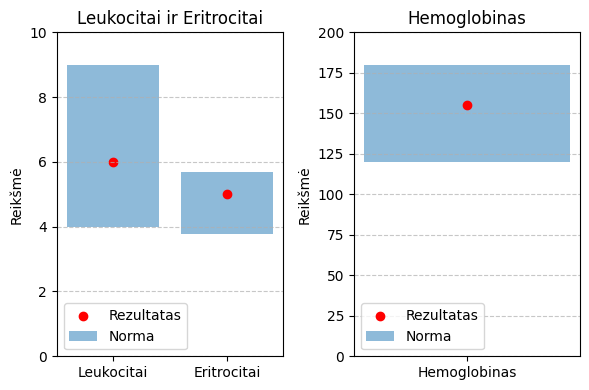

In [92]:
import numpy as np
import matplotlib.pyplot as plt


analites1 = ['Leukocitai', 'Eritrocitai']
norma_nuo1 = [4, 3.76]
norma_iki1 = [9, 5.7]
rezultatas1 = [6, 5]


analites2 = ['Hemoglobinas']
norma_nuo2 = [120]
norma_iki2 = [180]
rezultatas2 = [155]


fig, axs = plt.subplots(1, 2, figsize=(6, 4))


axs[0].bar(range(len(analites1)), np.array(norma_iki1) - np.array(norma_nuo1), bottom=norma_nuo1, label='Norma', alpha=0.5)
axs[0].scatter(range(len(rezultatas1)), rezultatas1, color='red', label='Rezultatas')
axs[0].set_xticks(range(len(analites1)))
axs[0].set_xticklabels(analites1)
axs[0].set_ylim(0, 10)
axs[0].set_ylabel("Reikšmė")
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_title('Leukocitai ir Eritrocitai')

axs[1].bar(range(len(analites2)), np.array(norma_iki2) - np.array(norma_nuo2), bottom=norma_nuo2, label='Norma', alpha=0.5)
axs[1].scatter(range(len(rezultatas2)), rezultatas2, color='red', label='Rezultatas')
axs[1].set_xticks(range(len(analites2)))
axs[1].set_xticklabels(analites2)
axs[1].set_ylim(0, 200)
axs[1].set_ylabel("Reikšmė")
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_title('Hemoglobinas')

plt.tight_layout()
plt.show()


In [93]:
# rezultatas0                #leukocitai
# rezultatas1                #eritrocitai 
# rezultatas2               #hemoglobinas


# 'Leukocitai  (WBC)', 'Hemoglobinas  (HGB)',  'Eritrocitai  (RBC)'
# 4-9, 120-180, 3,76-5,7

rezultatas0 = 7   
rezultatas1 = 120
rezultatas2 = 4

data_leuk = data4[data4['tyrimo_analite'] == 'Leukocitai  (WBC)']
data_hemo = data4[data4['tyrimo_analite'] == 'Hemoglobinas  (HGB)']
data_erit = data4[data4['tyrimo_analite'] == 'Eritrocitai  (RBC)']

leukocitu_vidurkis = data_leuk['analites_rezultatas'].mean()
hemoglobino_vidurkis = data_hemo['analites_rezultatas'].mean()
eritrocitu_vidurkis = data_erit['analites_rezultatas'].mean()

skirtumas_leuk = round(((leukocitu_vidurkis/rezultatas0)-1)*100, 2) 
skirtumas_hemo = round(((hemoglobino_vidurkis/rezultatas1)-1)*100, 2)
skirtumas_erit = round(((eritrocitu_vidurkis/rezultatas2)-1)*100, 2)

print(f'Jusu leukocitai: {rezultatas0} skiriasi {skirtumas_leuk} % nuo Vilkaviskio vidurkio')
print(f'Jusu hemoglobinas: {rezultatas1} skiriasi {skirtumas_hemo} % nuo Vilkaviskio vidurkio')
print(f'Jusu eritrocitai: {rezultatas2} skiriasi {skirtumas_erit} % nuo Vilkaviskio vidurkio')




Jusu leukocitai: 7 skiriasi 27.18 % nuo Vilkaviskio vidurkio
Jusu hemoglobinas: 120 skiriasi 4.91 % nuo Vilkaviskio vidurkio
Jusu eritrocitai: 4 skiriasi 8.31 % nuo Vilkaviskio vidurkio


In [98]:
data_leuk

,tyrimo_analite,analites_rezultatas,analites_norma_nuo,analites_norma_iki
58,Leukocitai (WBC),12.0,4.0,9.0
64,Leukocitai (WBC),5.0,4.0,9.0
71,Leukocitai (WBC),8.0,4.0,9.0
100,Leukocitai (WBC),14.0,4.0,9.0
104,Leukocitai (WBC),13.0,4.0,9.0
...,...,...,...,...
1298419,Leukocitai (WBC),7.0,4.0,9.0
1298447,Leukocitai (WBC),5.0,4.0,9.0
1298538,Leukocitai (WBC),8.0,4.0,9.0
1298614,Leukocitai (WBC),9.0,4.0,9.0


In [ ]:
leukocitai = data_leuk['analites_rezultatas'].tolist()
leukocitai.append(5)  # Add 5 to the list
leukocitai_sorted = sorted(leukocitai, reverse=True)
position = leukocitai_sorted.index(5) + 1  # Calculate the position of 5 in the sorted list
total_numbers = len(leukocitai_sorted)  # Calculate the total number of entries in the list
print(leukocitai_sorted)
print(f"5 yra {position}-oje vietoje sarase pagal dydi nuo didžiausio")
print(f"Iš viso sąraše yra {total_numbers} skaičių")


####  reikia sutvarkyti leukocitu stulepio duomenis 

[284.0, 265.0, 237.0, 173.0, 168.0, 164.0, 152.0, 148.0, 147.0, 141.0, 140.0, 138.0, 110.0, 99.0, 96.0, 96.0, 93.0, 93.0, 91.0, 89.0, 87.0, 86.0, 86.0, 84.0, 84.0, 82.0, 82.0, 79.0, 78.0, 78.0, 77.0, 75.0, 71.0, 69.0, 68.0, 66.0, 65.0, 65.0, 62.0, 60.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 56.0, 54.0, 54.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 47.0, 47.0, 47.0, 46.0, 45.0, 45.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32